<b>Importing Libraries</b>

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

<b>Extracting the data from dataset</b>
<ul>
    <li>importing data by pasing date and using it as index column</li>
    <li>filtering data of west bengal</li>
    <li>filtering data according to date from 1st june to 30th june</li>
</ul>

In [125]:
covid_19=pd.read_csv("C:/Users/Indranil Maji/Pandemic Analysis/DataSets/covid_19_india.csv",parse_dates=['Date'],index_col='Date')
covid_19

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1
2020-01-02,3,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3
2020-03-02,5,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
2020-03-07,3707,8:00 AM,Tripura,-,-,1146,1,1435
2020-03-07,3708,8:00 AM,Uttarakhand,-,-,2405,42,2984
2020-03-07,3709,8:00 AM,Uttar Pradesh,-,-,17221,735,24825


In [142]:
covid_19=pd.read_csv("C:/Users/Indranil Maji/Pandemic Analysis/DataSets/covid_19_india.csv",parse_dates=['Date'],index_col='Date')[['State/UnionTerritory','Cured','Deaths','Confirmed']]
covid_19=covid_19["2020-06-01":"2020-06-30"]
covid_19_WestBengal=covid_19[covid_19["State/UnionTerritory"]=="West Bengal"]
covid_19_Odisha=covid_19[covid_19["State/UnionTerritory"]=="Odisha"]
covid_19_Bihar=covid_19[covid_19["State/UnionTerritory"]=="Bihar"]
covid_19_Jharkhand=covid_19[covid_19["State/UnionTerritory"]=="Jharkhand"]

<b>Storing data according to following categorial list variables</b>

In [128]:
confirmed=covid_19_WestBengal[["Confirmed"]]
state=covid_19_WestBengal[["State/UnionTerritory"]]
deaths=covid_19_WestBengal[["Deaths"]]
recovered=state=covid_19_WestBengal[["Cured"]]

<b>Plotting a line graph in confirm, recovered and Deaths state</b>

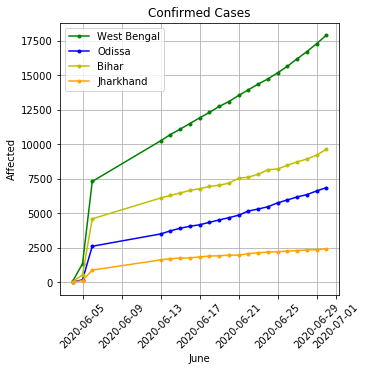

In [151]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
plt.title("Confirmed Cases")
plt.plot(confirmed,'g',marker='.',label="West Bengal")
plt.plot(covid_19_Odisha[['Confirmed']],'b',marker='.',label='Odissa')
plt.plot(covid_19_Bihar[['Confirmed']],'y',marker='.',label="Bihar")
plt.plot(covid_19_Jharkhand[['Confirmed']],'orange',marker='.',label="Jharkhand")
plt.xlabel('June')
plt.ylabel('Affected')
plt.grid()
plt.legend()
plt.savefig("Confirmed.png")

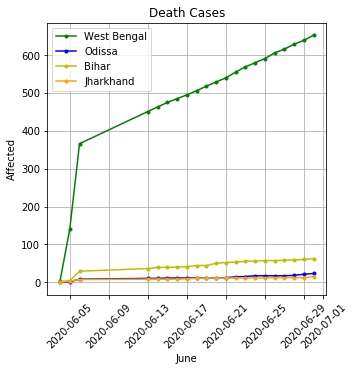

In [154]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
plt.title("Death Cases")
plt.plot(deaths,'g',marker='.',label="West Bengal")
plt.plot(covid_19_Odisha[['Deaths']],'b',marker='.',label='Odissa')
plt.plot(covid_19_Bihar[['Deaths']],'y',marker='.',label="Bihar")
plt.plot(covid_19_Jharkhand[['Deaths']],'orange',marker='.',label="Jharkhand")
plt.xlabel('June')
plt.ylabel('Affected')
plt.grid()
plt.legend()
plt.savefig("Deaths.png")

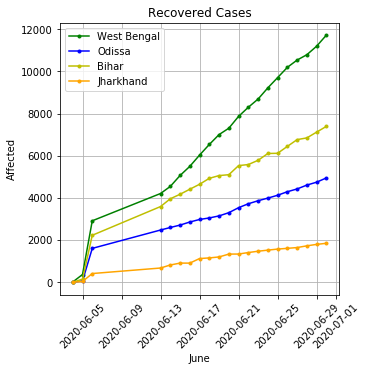

In [155]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
plt.title("Recovered Cases")
plt.plot(recovered,'g',marker='.',label="West Bengal")
plt.plot(covid_19_Odisha[['Cured']],'b',marker='.',label='Odissa')
plt.plot(covid_19_Bihar[['Cured']],'y',marker='.',label="Bihar")
plt.plot(covid_19_Jharkhand[['Cured']],'orange',marker='.',label="Jharkhand")
plt.xlabel('June')
plt.ylabel('Affected')
plt.grid()
plt.legend()
plt.savefig("Recovered.png")

In [131]:
def diffrow(data):
    covid_19_con_list=list(data)
    k=list(range(len(covid_19_con_list)))
    for i in range(0,len(covid_19_con_list)):
        if i<1:
            k[i]=covid_19_con_list[i]
        else:
            k[i]=covid_19_con_list[i]-covid_19_con_list[i-1]
    return k

### Adding a 'new cases' column from june1 to 30

In [143]:
covid_19_WestBengal['new cases']=diffrow(covid_19_WestBengal['Confirmed'])
covid_19_Bihar['new cases']=diffrow(covid_19_Bihar['Confirmed'])
covid_19_Jharkhand['new cases']=diffrow(covid_19_Jharkhand['Confirmed'])
covid_19_Odisha['new cases']=diffrow(covid_19_Odisha['Confirmed'])

<ipython-input-143-67a6e80501f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_WestBengal['new cases']=diffrow(covid_19_WestBengal['Confirmed'])
<ipython-input-143-67a6e80501f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Bihar['new cases']=diffrow(covid_19_Bihar['Confirmed'])
<ipython-input-143-67a6e80501f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

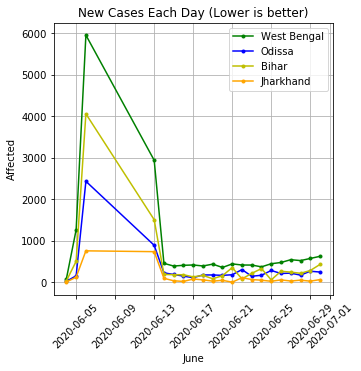

In [152]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
plt.title("New Cases Each Day (Lower is better)")
plt.plot(covid_19_WestBengal[['new cases']],'g',marker='.',label="West Bengal")
plt.plot(covid_19_Odisha[['new cases']],'b',marker='.',label='Odissa')
plt.plot(covid_19_Bihar[['new cases']],'y',marker='.',label="Bihar")
plt.plot(covid_19_Jharkhand[['new cases']],'orange',marker='.',label="Jharkhand")
plt.xlabel('June')
plt.ylabel('Affected')
plt.grid()
plt.legend()
plt.savefig("newCases.png")

### Getting information about hospitalbeds dataset and impoting it for further visualization

In [146]:
covid_hospitalbeds=pd.read_csv("C:/Users/Indranil Maji/Pandemic Analysis/DataSets/HospitalBedsIndia.csv")
covid_hospitalbeds[covid_hospitalbeds['State/UT']=='West Bengal'][['State/UT','NumPublicBeds_HMIS','NumRuralBeds_NHP18','NumUrbanBeds_NHP18']]
covid_hospitalbeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     int64  
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 3   NumCommunityHealthCenters_HMIS    37 non-null     int64  
 4   NumSubDistrictHospitals_HMIS      30 non-null     float64
 5   NumDistrictHospitals_HMIS         37 non-null     int64  
 6   TotalPublicHealthFacilities_HMIS  37 non-null     int64  
 7   NumPublicBeds_HMIS                37 non-null     int64  
 8   NumRuralHospitals_NHP18           37 non-null     int64  
 9   NumRuralBeds_NHP18                37 non-null     int64  
 10  NumUrbanHospitals_NHP18           37 non-null     int64  
 11  NumUrbanBeds_NHP18                37 non-null     int64  
dtypes: float64

In [135]:
covid_19_WestBengal1=covid_19[covid_19["State/UnionTerritory"]=="West Bengal"]
covid_19_WestBengal1['new cases']=diffrow(covid_19_WestBengal1['Confirmed'])
covid_19_WestBengal1

<ipython-input-135-7854e9a5a742>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_WestBengal1['new cases']=diffrow(covid_19_WestBengal1['Confirmed'])


,State/UnionTerritory,Cured,Deaths,Confirmed,new cases
Date,,,,,
2020-06-04,West Bengal,10,3,80,80
2020-06-05,West Bengal,364,140,1344,1264
2020-06-06,West Bengal,2912,366,7303,5959
2020-06-13,West Bengal,4206,451,10244,2941
2020-06-14,West Bengal,4542,463,10698,454
2020-06-15,West Bengal,5060,475,11087,389
2020-06-16,West Bengal,5494,485,11494,407
2020-06-17,West Bengal,6028,495,11909,415
2020-06-18,West Bengal,6533,506,12300,391


### Adding a new column of Public_Beds_Left to covid_19 dataframe

In [136]:
total_beds=list(range(len(covid_hospitalbeds)))
list1=list(covid_hospitalbeds['NumPublicBeds_HMIS'])
list2=list(covid_hospitalbeds['NumRuralBeds_NHP18'])
list3=list(covid_hospitalbeds['NumUrbanBeds_NHP18'])
for i in range(0,len(list1)):
    total_beds[i]=list1[i]
covid_hospitalbeds['Total_Beds']=total_beds
k=covid_hospitalbeds.loc[35][12]
k=int(k)
def bedsleft(l,k):
    ln=list(range(len(list(l))))
    nc=list(l)
    for i in range(0,len(nc)):
        if(k>0):
            if k>nc[i]:
                ln[i]=k=k-nc[i]
            else:
                ln[i]=k=nc[i]-k
        else:
            ln[i]=0
    return ln
covid_19_WestBengal1["Public_Beds_Left"]=bedsleft(covid_19_WestBengal1['new cases'],k)

covid_19_WestBengal2=covid_19_WestBengal1["2020-06-01":"2020-07-01"]

<ipython-input-136-ab906383faac>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_WestBengal1["Public_Beds_Left"]=bedsleft(covid_19_WestBengal1['new cases'],k)


In [137]:
covid_19_Odisha1=covid_19[covid_19["State/UnionTerritory"]=="Odisha"]
covid_19_Odisha1['new cases']=diffrow(covid_19_Odisha1['Confirmed'])
ko=covid_hospitalbeds[covid_hospitalbeds['State/UT']=="Odisha"]['Total_Beds']
covid_19_Odisha1['Public_Beds_Left']=bedsleft(covid_19_Odisha1['new cases'],int(ko))
covid_19_Odisha1
covid_19_Odisha2=covid_19_Odisha1["2020-06-01":"2020-07-01"]

<ipython-input-137-22e028c606be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Odisha1['new cases']=diffrow(covid_19_Odisha1['Confirmed'])
<ipython-input-137-22e028c606be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Odisha1['Public_Beds_Left']=bedsleft(covid_19_Odisha1['new cases'],int(ko))


In [138]:
covid_19_Bihar1=covid_19[covid_19["State/UnionTerritory"]=="Bihar"]
covid_19_Bihar1['new cases']=diffrow(covid_19_Bihar1['Confirmed'])
kb=covid_hospitalbeds[covid_hospitalbeds['State/UT']=="Bihar"]['Total_Beds']
covid_19_Bihar1['Public_Beds_Left']=bedsleft(covid_19_Bihar1['new cases'],int(kb))
covid_19_Bihar2=covid_19_Bihar1["2020-06-01":"2020-07-01"]

<ipython-input-138-bb69145a81f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Bihar1['new cases']=diffrow(covid_19_Bihar1['Confirmed'])
<ipython-input-138-bb69145a81f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Bihar1['Public_Beds_Left']=bedsleft(covid_19_Bihar1['new cases'],int(kb))


In [139]:
covid_19_Jharkhand1=covid_19[covid_19["State/UnionTerritory"]=="Jharkhand"]
covid_19_Jharkhand1['new cases']=diffrow(covid_19_Jharkhand1['Confirmed'])
ko=covid_hospitalbeds[covid_hospitalbeds['State/UT']=="Jharkhand"]['Total_Beds']
covid_19_Jharkhand1['Public_Beds_Left']=bedsleft(covid_19_Jharkhand1['new cases'],int(ko))
covid_19_Jharkhand1
covid_19_Jharkhand2=covid_19_Jharkhand1["2020-06-01":"2020-07-01"]

<ipython-input-139-f10ae83c06f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Jharkhand1['new cases']=diffrow(covid_19_Jharkhand1['Confirmed'])
<ipython-input-139-f10ae83c06f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Jharkhand1['Public_Beds_Left']=bedsleft(covid_19_Jharkhand1['new cases'],int(ko))


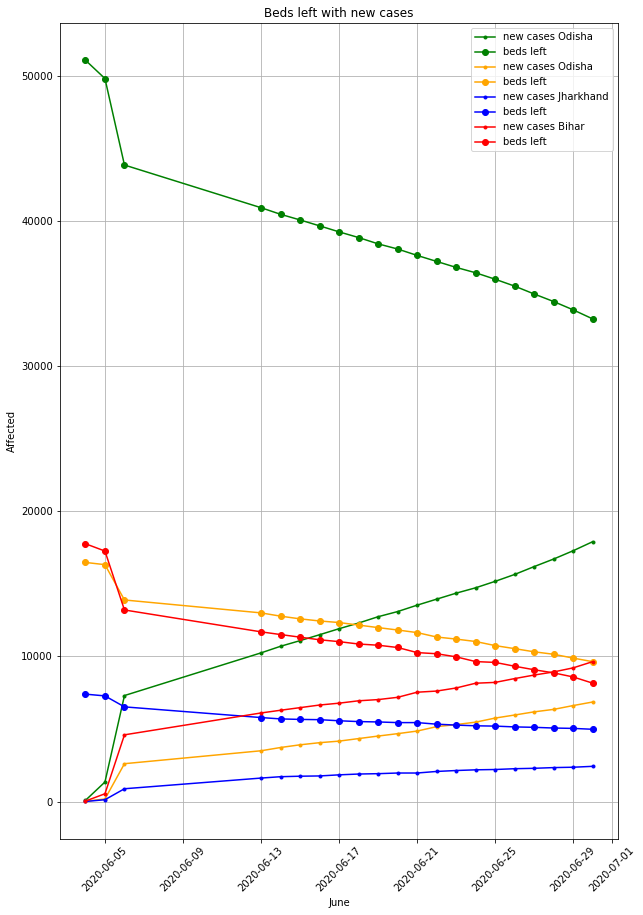

In [153]:
plt.figure(figsize=(10,15))
plt.xticks(rotation=45)
plt.title("Beds left with new cases")
plt.plot(covid_19_WestBengal2[['Confirmed']],'g',marker='.',label="new cases Odisha")
plt.plot(covid_19_WestBengal2[['Public_Beds_Left']],'g',marker='o',label='beds left')
plt.plot(covid_19_Odisha2[['Confirmed']],'orange',marker='.',label="new cases Odisha")
plt.plot(covid_19_Odisha2[['Public_Beds_Left']],'orange',marker='o',label='beds left')
plt.plot(covid_19_Jharkhand2[['Confirmed']],'blue',marker='.',label="new cases Jharkhand")
plt.plot(covid_19_Jharkhand2[['Public_Beds_Left']],'blue',marker='o',label='beds left')
plt.plot(covid_19_Bihar2[['Confirmed']],'red',marker='.',label="new cases Bihar")
plt.plot(covid_19_Bihar2[['Public_Beds_Left']],'red',marker='o',label='beds left')
plt.xlabel('June')
plt.ylabel('Affected')
plt.grid()
plt.legend()
plt.savefig("BedsLeft.png")